<a href="https://colab.research.google.com/github/abhijeet-samantaray/GrowthLink/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here's a peek at the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Dataset contains 150 rows and 5 columns
Summary statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900

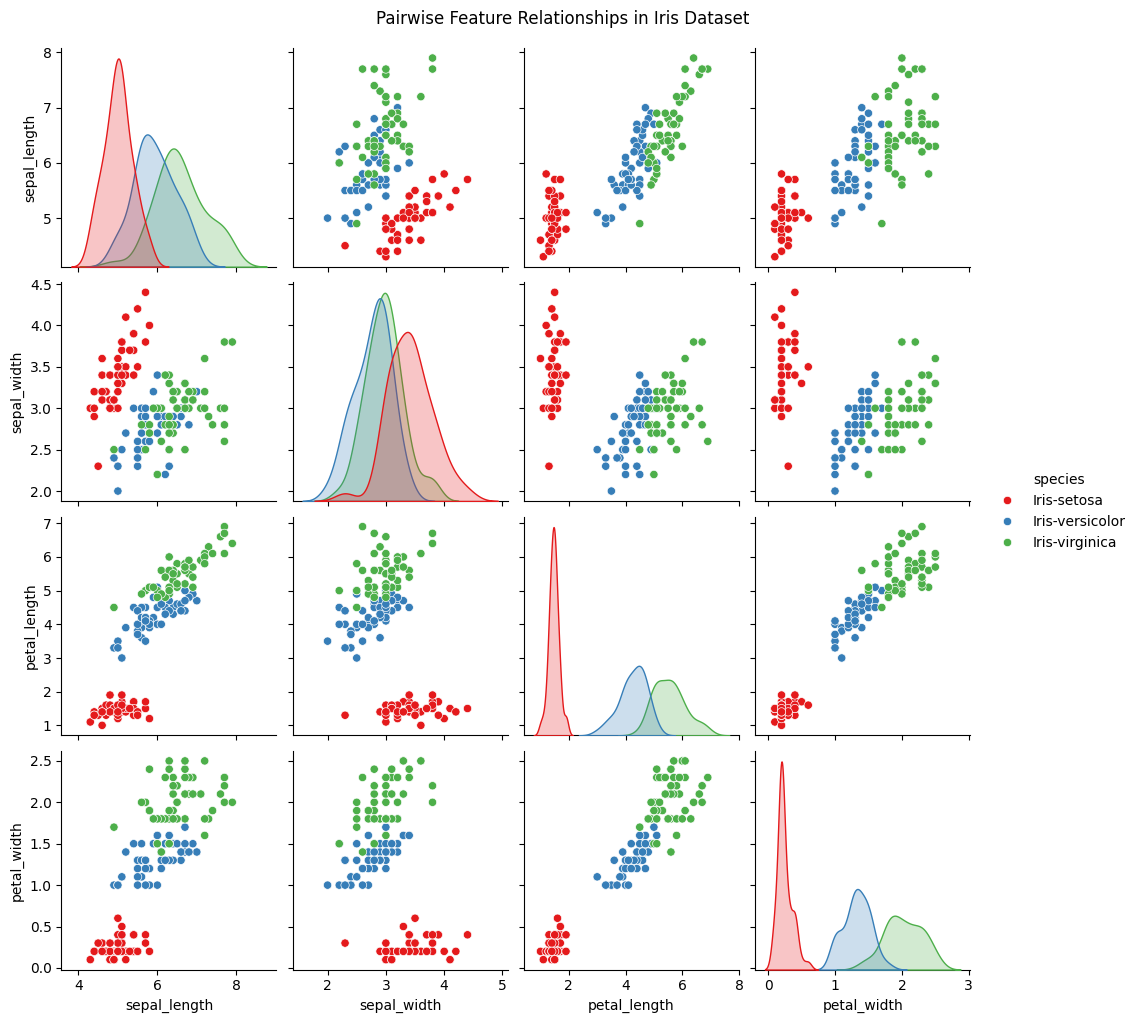

Split the data into training and testing sets.
Training the KNN model...
Model Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Detailed Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



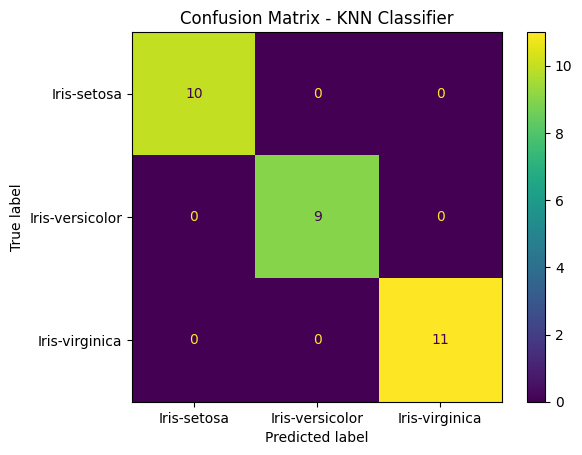

In [7]:

import pandas as pd

# Load the dataset - make sure this path works for your setup
df = pd.read_csv(r'/content/IRIS.csv')

# Let's take a quick look to get a feel for the data
print("Here's a peek at the dataset:")
print(df.head())

# Just checking how big the dataset is
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

# Curious about basic stats – let's see how the features are distributed
print("Summary statistics:")
print(df.describe())

# Sanity check for missing data (fingers crossed)
print("Any missing values?")
print(df.isnull().sum())

# Class distribution might help us spot imbalances (if any)
print("How are the flower species distributed?")
print(df['species'].value_counts())

# Visual exploration time!
import seaborn as sns
import matplotlib.pyplot as plt

# Let's see how the features relate across different species
print("Plotting pairwise relationships...")
sns.pairplot(df, hue='species', palette='Set1')
plt.suptitle('Pairwise Feature Relationships in Iris Dataset', y=1.02)
plt.show()

from sklearn.model_selection import train_test_split

# Defining inputs and outputs
X = df.iloc[:, :-1]  # features: all but last column
y = df['species']    # target: species column

# We'll go with a typical 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Split the data into training and testing sets.")

# Let's go with a simple k-NN model for now – might try others later
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
print("Training the KNN model...")
knn_model.fit(X_train, y_train)

# Time to test how well it learned
y_pred = knn_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy is a good start, though not everything
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Let's dig deeper into model performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Detailed Classification Report:")
print(classification_report(y_test, y_pred))

# A nicer visual of the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test)
plt.title("Confusion Matrix - KNN Classifier")
plt.show()
